# Loading our stored cnn model
#reading some new images to predict the class


[1] importing python needed libraries

In [ ]:
#importing the libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd

[2]defining function to read images data from folder (counting them )and store x data in array to start prediction

In [ ]:
def images_to_predict (path):
   count_samples=0
   img_data_func = []
   for img in os.listdir(path):
      pic = cv2.imread(os.path.join(path,img))
      pic = cv2.cvtColor(pic ,cv2.COLOR_BGR2RGB)
      pic = cv2.resize(pic,(128,128))
      img_data_func.append([pic])
      count_samples=count_samples+1

   predictX=np.array(img_data_func)
   return predictX ,count_samples

In [ ]:
classids=["Architecture","Culture & Art","Food & Drinks","Travel & Adventure"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classids[y[index]])

[5] calling function to read the data .

reshaping data into
(counter,128,128,3) where counter is the images counted.

normalizing data by dividing rgb values by 255 so values become between 0 and 1 (to minimize calculation time)

In [ ]:
X_predict ,counter =images_to_predict("/content/drive/MyDrive/predict")
X_predict=X_predict.reshape(counter,128,128,3)/255.0

[6] loading and compiling our stored h5 file of the cnn model

In [ ]:
model = load_model('/content/drive/MyDrive/images/cnn_final_model.h5')
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

[7] making the classification and testing it by plotting some of the pictures

In [ ]:
predictions=model.predict(X_predict)
y_classes = np.array([np.argmax(element) for element in predictions])

2/2 [==============================] - 1s 203ms/step


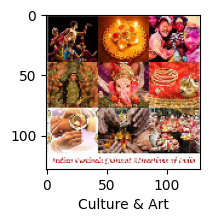

In [ ]:
plot_sample(X_predict, y_classes, 15)


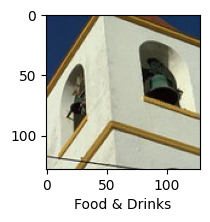

In [ ]:
plot_sample(X_predict, y_classes, 9)


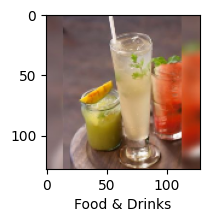

In [ ]:
plot_sample(X_predict, y_classes, 40)


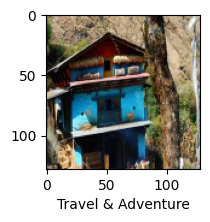

In [ ]:
plot_sample(X_predict, y_classes, 55)


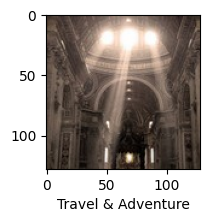

In [ ]:
plot_sample(X_predict, y_classes, 10)


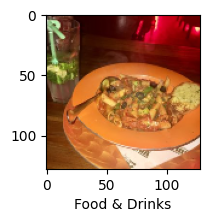

In [ ]:
plot_sample(X_predict, y_classes, 33)


# Thank you
# Dalal Adnan
July 2023